# Damped driven oscillator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

# center the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Damped Driven Harmonic Oscillator

To have something more complicated we have a look at the damped driven harmonic oscialltor which is described by the following differential equation.

\begin{equation}\label{hosc}
\ddot{x}=-\frac{k}{m}x-\gamma \dot{x}+\beta\cos(\omega t)
\end{equation}

The first term on the right side of the above equation denotes the force exterted by the spring $k$ on the mass $m$. The system is damped due to a friction term which is proportational to the velocity $\dot{x}$ and the friction coefficient $\gamma$. Finally, there is a driving with a cosine term at a frequency $\omega$, with the amplitude $\beta$. The unit of $\beta$ is force/mass. We can also express the driving oscillation as

\begin{equation}
F(t)=k X_{0}\cos(\omega t)
\end{equation}

where $X_{0}$ could be a driving pistons amplitude. Thus $\beta=\omega_0^{2}X_{0}$.

![Figure 1](piston.png)

From this equation of motion, we can define our *derivs* function:

~~~
def pendulum_def(state , time):
    g0 = state[1]   # velocity
    g1 = -k/m * state[0] - gamma*state[1] + beta*np.cos(omega * time) #acceleration
    return np.array([g0, g1]) 
~~~

This is our version of the *derivs* function which we are going to use with the *SciPy* solver and plot the result for different parameters. Vary the damping parameter $\gamma$. 

#### The homogeneous solution of the oscillator

We may first explore the homogeneous solution of our damped harmonic oscillator. The homogeneous solution means, we do not have a driving force and you might remember your mechanics lectures that in this case we can identify three different solutions comprising the

* oscillating solution ($\gamma^2/4-\omega_0^2<0$)
* aperiodic limit ($\gamma^2/4-\omega_0^2=0$)
* creeping case ($\gamma^2/4-\omega_0^2>0$)

We may Check for these solutions by varying our oscialltor parameters.

In [163]:
k = 1.8 # spring constant
m=10.0 # mass
beta=0 # driving amplitude, no driving first
omega_0=np.sqrt(k/m) # natural frequency
gamma=0.5*omega_0# oscillating solution
#gamma=2*omega_0# aperiodic limit
#gamma=3*omega_0# creeping solution


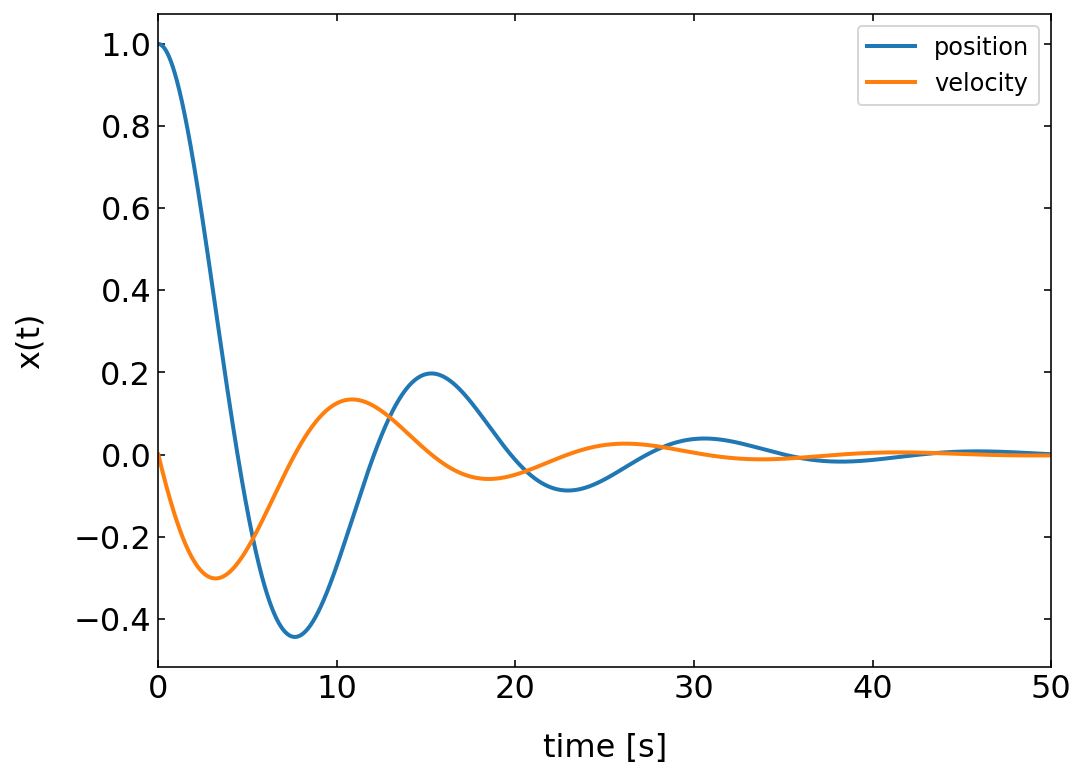

In [165]:
#pendulum derivs function

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

N = 200000  # number of steps
xo = 1 # initial position
vo = 0.0 # initial velocity
tau = 100.0 # time period

omega=0.5


time = np.linspace(0, tau, N)

y = np.zeros (2)
y[0] = xo 
y[1] = vo

def spring_def(state , time):
    g0 = state[1]
    g1 = -k/m * state[0] - gamma*state[1] + beta*np.cos(omega * time)
    return np.array([g0, g1]) 

answer = odeint( spring_def, y , time )    
fig=plt.figure(1, figsize = (8,6) )
plt.plot(time, answer[:,0],lw=2,label='position')
plt.plot(time, answer[:,1],lw=2,label='velocity')
plt.xlim(0,50)
plt.xlabel('time [s]', fontsize=16)
plt.ylabel('x(t)',fontsize=16)
plt.legend()

plt.show()

#### The driven solution of the oscillator

Now we may add the driving to the solution und study the difference also for the three different case shown for the homogeneous solution.

In [184]:
k = 9.8 # spring constant
m=10.0 # mass
beta=0.1 # driving amplitude, no driving first
omega_0=np.sqrt(k/m) # natural frequency
#gamma=0.5*omega_0# oscillating solution
#gamma=2*omega_0# aperiodic limit
gamma=3*omega_0# creeping solution



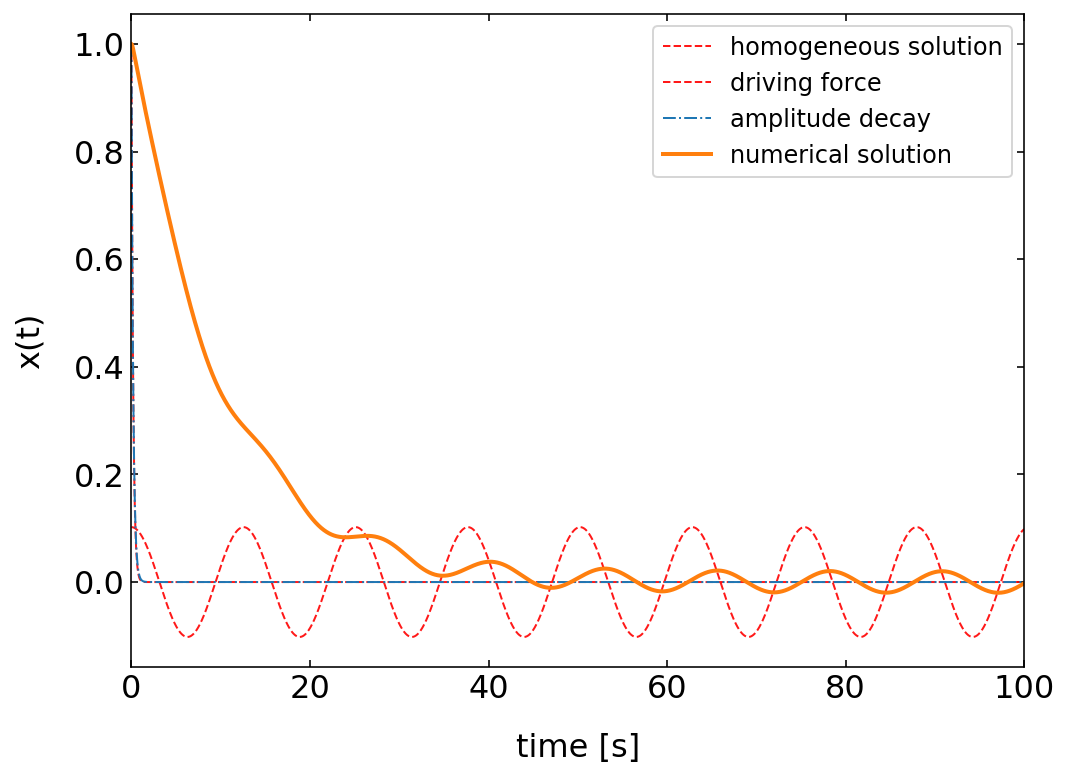

In [183]:
#pendulum derivs function

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

N = 200000  # number of steps
xo = 1 # initial position
vo = 0.0 # initial velocity
tau = 200.0 # time period

omega=0.5

time = np.linspace(0, tau, N)

y = np.zeros (2)
y[0] = xo 
y[1] = vo

def spring_def(state , time):
    g0 = state[1]
    g1 = -k/m * state[0] - gamma*state[1] + beta*np.cos(omega * time)
    return np.array([g0, g1]) 

answer = odeint( spring_def, y , time )    

fig=plt.figure(1, figsize = (8,6) )
plt.plot(time,np.cos(omega_0*time)*np.exp(-gamma*time/2),'r--',alpha=0.9,label='homogeneous solution')
plt.plot(time,beta*np.cos(omega * time)/(omega_0**2),'r--',alpha=0.9,label='driving force')
plt.plot(time,np.exp(-gamma*time/2),'-.',label='amplitude decay')
plt.plot(time, answer[:,0],lw=2,label='numerical solution')
plt.xlim(0,100)
plt.xlabel('time [s]', fontsize=16)
plt.ylabel('x(t)',fontsize=16)
plt.legend()
plt.show()


The solution looks interesting. There is a fast initial oscillation, which decays with time until a slower oscillation with constant amplitude remains. Solving the inhomogeneous differential equation yields the sum of the particular plus the homogenous solution. That's what we observe here. The decaying oscillation at the beginning is the homogeneous solution. You can easily check that be setting the driving amplitude to $\beta=0$. The result is just the damped harmonic oscillator. The second oscillation is therefore the driven oscillation, which sustains at long times. This is the one, that we typically analyze in the physics lectures. 

***
**Play Around** Overall the transient pattern can be quite complex with beat notes. Just change the above parameters to $\gamma=0.05$ and $\omega=1$ and you will notice the complex transient behavior.
***

The damped driven harmonic oscillator is a well studied system of course and we can write down the stationary analytic solution and compare that with our numerical solution later

\begin{equation}
x(t)=x(0)\cos(\omega_0 t)e^{-\frac{\gamma}{2}t}+x_{0}\cos(\omega t-\phi)
\end{equation}

with the frequency dependent amplitude $x_{0}$ 

\begin{equation}
    x_{0}=\frac{\beta}{[(\omega_{0}^2-\omega^2)^2+\gamma^2\omega^2]^{1/2}}
\end{equation}


and the phase $\phi$ of the oscillator 

\begin{equation}
    \phi=\tan^{-1}\left(\frac{\gamma\omega}{\omega_{0}^2+\omega^2}\right)
\end{equation}

The harmonic oscillator is a working horse for many problems in physics. If you describe just the motion of a spring or the oscillation of a transition dipole that radiates. All of those things may be approximated by a simple harmonic oscillator and give some insight. 



#### Analytical solution

The two functions below deliver the analytical solution of the damped harmonic oscillator problem.

In [73]:
def a_amplitude(beta,omega, omega_0,gamma):
    return(beta/np.sqrt((omega_0**2-omega**2)**2+gamma**2*omega**2))

def a_phase(omega,omega_0,gamma):
    return(np.arctan2(gamma*omega,omega_0**2-omega**2))

***
### Amplitude and Phase

#### Analysis of the numerical solution

We now have calculated the position and velocity of the damped driven oscillator. But we would like to know some more details. The analytical solution gives us an idea about the amplitude and the phase of the sustaining driven oscillation. We would therefore like to calculate the phase and amplitude as a function of the driving frequency ($\omega$). Both parameters can be calculated easily from a Fourier transform. Since we want to introduce the Fourier transform later, we think about a simpler solution. Well, the simpler solution is nothing else than a modified version of the Fourier transform. The analysis we would like to do is based on the trigonometric addition formula

\begin{equation}
x_{0}\cos(\omega t -\phi)=x_{0}\cos(\omega t) \cos(\phi) + x_{0}\sin(\omega t) \sin(\phi)
\end{equation}

which is saying that if we have a cosine oscillation, that is phase shifted by $\phi$ with respect to an reference cosine oscillation, then the oscillation can be expressed as a mixture of sine and cosine oscillations of the same frequency with modified amplitudes according to the phase shift. If we take now this formula and multiply both sides with the reference oscillation $\cos(\omega t)$ and integrate over one period we obtain

\begin{equation}
x_{0}\int_{0}^{T} \cos(\omega t +\phi)\cos(\omega t) dt=x_{0}\cos(\phi)\int_{0}^{T} \cos^2(\omega t) dt + x_{0}\sin(\phi)\int_{0}^{T} \sin(\omega t)\cos(\omega t) dt=x_{0}\pi\cos(\phi)
\end{equation}

The first integral yields $x_{0}\pi\cos(\phi)$, while the second integral is zero. 
You can do the same with multiplying by $\sin(\omega t)$. The result is then $x_{0}\pi\sin(\phi)$. With both calculations we may thus obtain the phase angle 

\begin{equation}
\phi=\tan^{-1}\left(\frac{\sin(\phi)}{\cos(\phi)}\right)
\end{equation}

Accordingly, we are also able to obtain the amplitude of the oscillation from 

\begin{equation}
x_{0}=\sqrt{x_{0}^2\sin^2(\phi)+x_{0}^2\cos^2(\phi)}
\end{equation}

Below, we do a slightly cheaper analysis. We don't really know the beginning and end of the period of oscillation. 

In [74]:
#pendulum derivs function

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def get_phase(omega):
    N = 200000  # number of steps
    xo = 1.0 # initial position
    vo = 0 # initial velocity
    tau = 200.0 # time period
    
    time = np.linspace(0, tau, N)

    y = np.zeros (2)
    y[0] = xo # initial conditions
    y[1] = vo  # initial conditions

    def pendulum_def(state , time):
        g0 = state[1]
        g1 = -k/m * state[0] - gamma*state[1] + beta*np.cos(omega * time)
        return np.array([g0, g1]) 

    answer = odeint( pendulum_def, y , time )   
    return(time, answer)

#### calculate the analytical data

In [75]:
k = 9.8 # spring constant
m=10.0 # mass
gamma=0.2# damping constant
beta=0.1 # driving amplitude
omega_0=np.sqrt(k/m) # natural frequency

In [76]:
omega=np.arange(0.1,2,0.02)
x0=a_amplitude(beta,omega, omega_0,gamma)
phi=a_phase(omega,omega_0,gamma)

#### calculate the numerical data

In [77]:
n_phi=np.zeros(len(omega))
n_x0=np.zeros(len(omega))

for j in range(len(omega)):
    time,a=get_phase(omega[j])
    # this is a tricky part here.
    # we would like to integrate over a period or several periods. to do so, we determine how many elements
    # in omega*time are corresponding to 2*pi
    N0=50000
    dN=np.argmin(np.abs(omega[j]*time-2*np.pi))*50

    cs=np.sum(a[N0:N0+dN,0]*np.cos(omega[j] * time[N0:N0+dN]))*(time[1]-time[0])
    ss=np.sum(a[N0:N0+dN,0]*np.sin(omega[j] * time[N0:N0+dN]))*(time[1]-time[0])
    n_phi[j]=(np.arctan2(ss,cs)/np.pi)
    n_x0[j]=(np.sqrt(cs**2+ss**2))


#### plot the analytical and numerical data

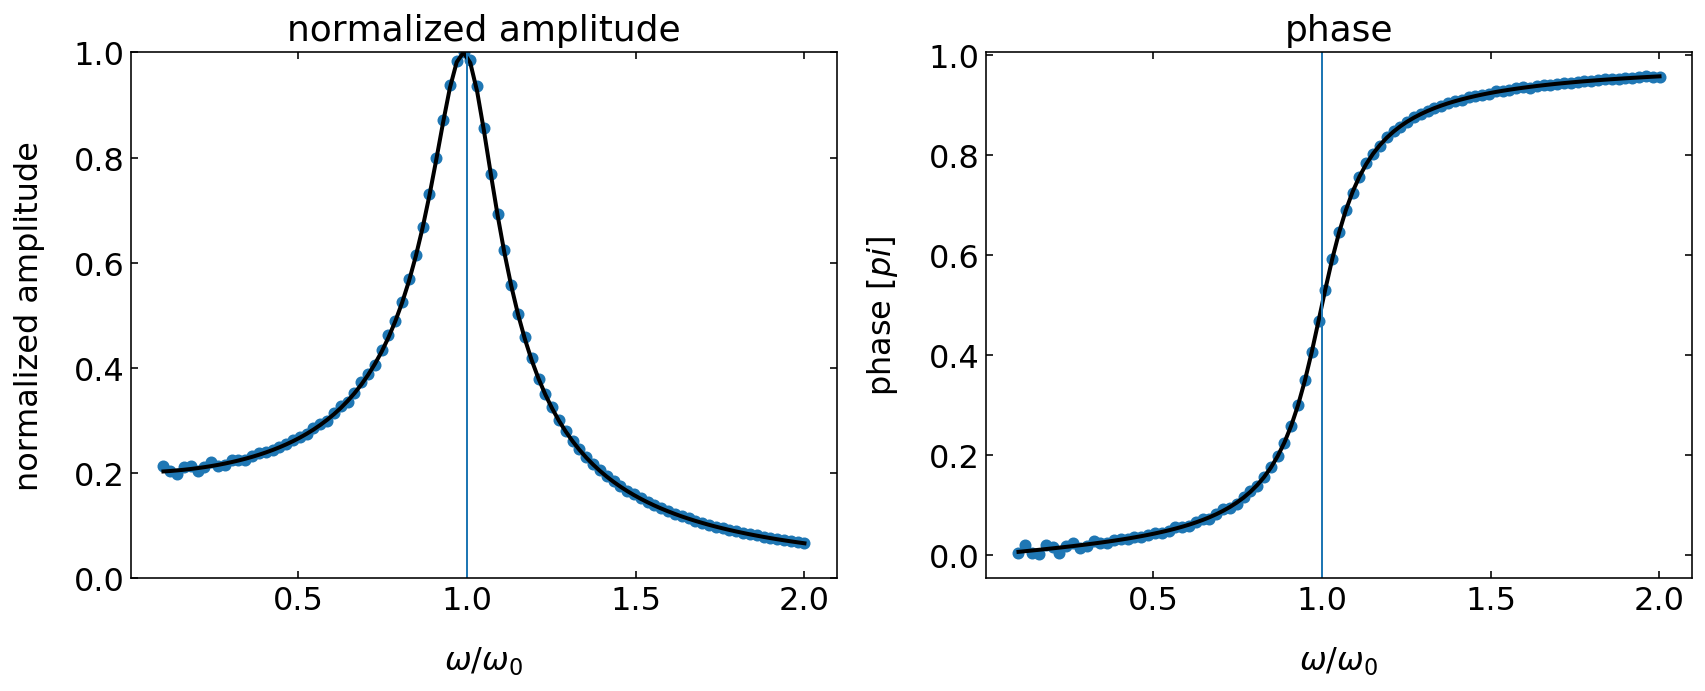

In [78]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('normalized amplitude')
plt.plot(omega/omega_0,np.array(n_x0)/np.max(n_x0),'.',lw=1)
plt.plot(omega/omega_0,x0/np.max(x0),'k-',lw=2)
plt.xlabel("$\omega/\omega_{0}$")
plt.ylabel("normalized amplitude")
plt.axvline(x=1)
plt.ylim(0,1)

plt.subplot(1, 2, 2)
plt.title('phase')
plt.plot(omega/omega_0,n_phi,'.',lw=1)
dd=(0.98-omega**2)
plt.plot(omega/omega_0,phi/np.pi,'k-',lw=2)
plt.xlabel("$\omega/\omega_{0}$")
plt.ylabel("phase [$pi$]")
plt.axvline(x=1)
plt.tight_layout()
plt.show()

***
**Play Around** Play around with the above analysis to see what happens if you change the damping $\gamma$ for example. You should also notice, that our simple analsis of phase and amplitude fails at certain points.
***

***
### Energy and driving power

The kinetic and potential energy can be calculated as a function of time by 

\begin{equation}
E_{kin}=\frac{m}{2}\dot{x}^2
\end{equation}

and

\begin{equation}
E_{kin}=\frac{k}{2}x^2
\end{equation}

The total energy is then 

\begin{equation}
E_{tot}=E_{kin}+E_{pot}
\end{equation}

In [197]:
k = 2.8 # spring constant
m=10.0 # mass
beta=0.1# driving amplitude
omega_0=np.sqrt(k/m) # natural frequency
#gamma=0.5*omega_0# oscillating solution
gamma=2*omega_0# aperiodic limit
#gamma=3*omega_0# creeping solution



In [198]:
#pendulum derivs function

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

N = 200000  # number of steps
xo = 1.0 # initial position
vo = 0. # initial velocity
tau = 200.0 # time period

omega=0.5

time = np.linspace(0, tau, N)

y = np.zeros (2)
y[0] = xo 
y[1] = vo

def pendulum_def(state , time):
    g0 = state[1]
    g1 = -k/m * state[0] - gamma*state[1] + beta*np.cos(omega * time)
    return np.array([g0, g1]) 

answer = odeint( pendulum_def, y , time )    



***
#### Energy

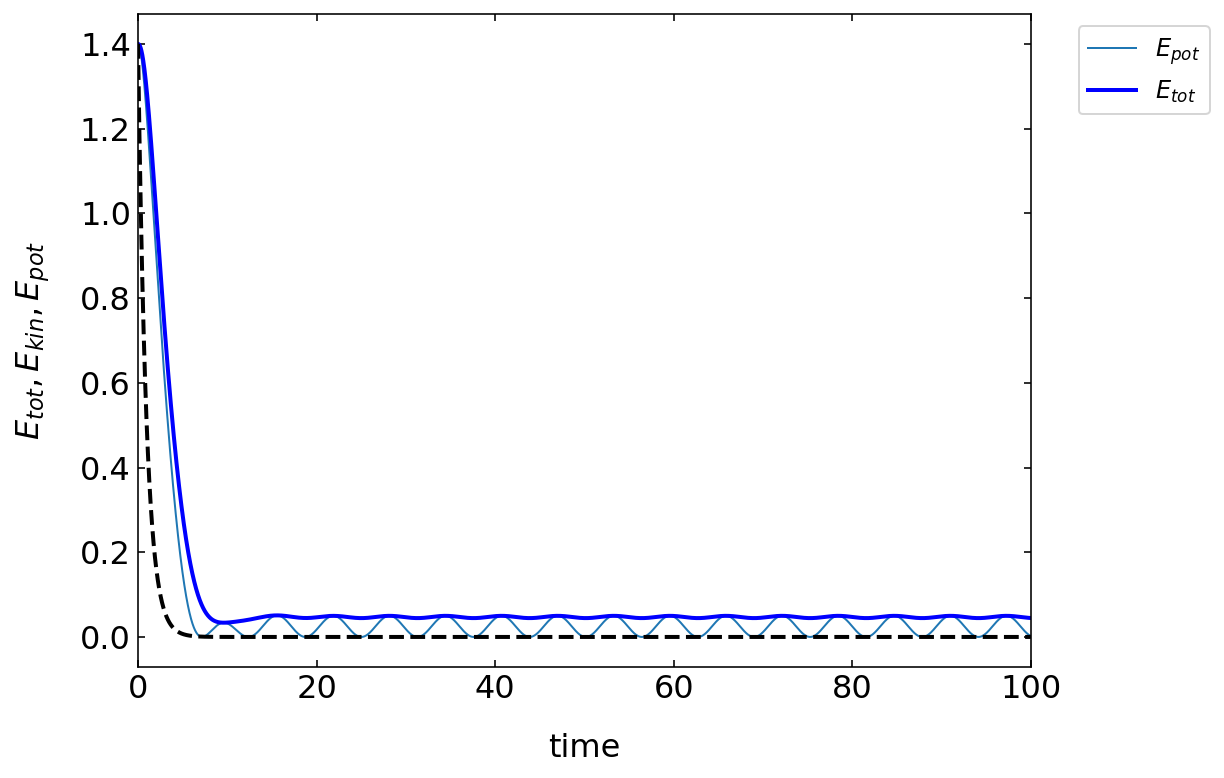

In [199]:
fig=plt.figure(1, figsize = (8,6) )
e_pot=k*answer[:,0]**2/2
e_kin=m*answer[:,1]**2/2
e_tot=e_pot+e_kin
plt.plot(time,e_pot,label='$E_{pot}$')
#plt.plot(time,e_kin,label='$E_{kin}$')
plt.plot(time,e_tot,'b-',lw=2,label='$E_{tot}$')
plt.plot(time,e_tot[0]*np.exp(-gamma*time),'k--',lw=2)
plt.xlabel('time')
plt.ylabel('$E_{tot}, E_{kin}, E_{pot}$')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlim(0,100)
plt.show()

***
**Play Around** Change some of the parameters in the above script, i.e. to switch of driving. You may also want to have a look at different driving frequencies. Note that the resonance shall be at $\Omega=0.98$. Think about the solutions and why it is like that.
***

#### Driving Power

The driving power that is absorbed by the system can be obtained from 

\begin{equation}
P=m\beta\cos(\omega t) \dot{x}
\end{equation}

It follows the velocity of the oscillator and is found for the stationary state to be


\begin{eqnarray}
P&=&- m\beta x_{0}\omega \cos(\omega t) \sin(\omega t -\phi)\\
 &=& - m\beta x_{0}\omega [\cos(\omega t)\sin(\omega t)\cos(\phi)-\cos^2(\omega t)\sin(\phi)]
\end{eqnarray}

#### numerical power

In [200]:
n_power=m*beta*np.cos(omega*time)*answer[:,1]

#### analytical power 

In [201]:
x0=a_amplitude(beta,omega, omega_0,gamma)
phi=a_phase(omega,omega_0,gamma)
a_power=-m*beta*x0*omega*(np.cos(omega*time)*np.sin(omega*time)*np.cos(phi)-np.sin(phi)*np.cos(omega*time)**2)

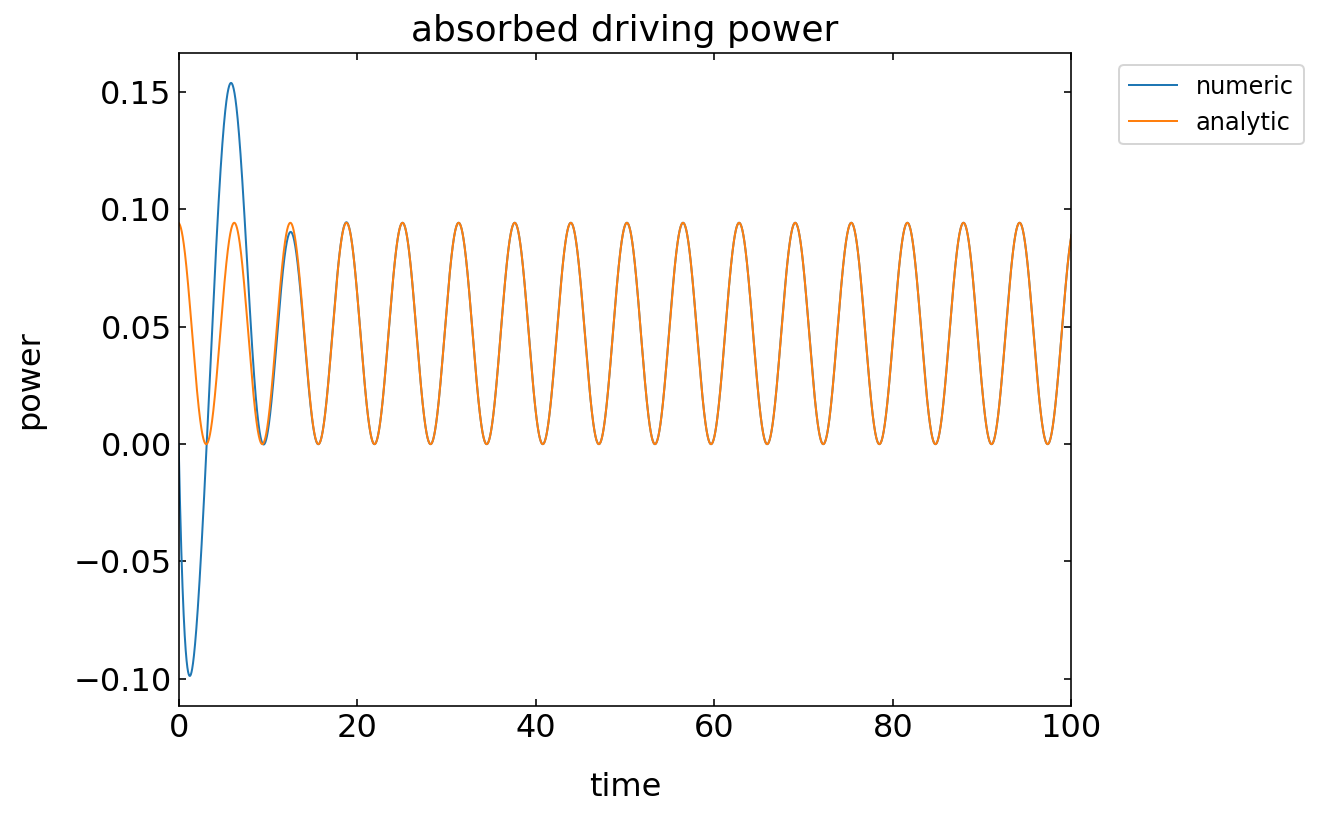

In [202]:
plt.figure( figsize = (8,6) )
plt.title('absorbed driving power')
plt.plot(time,n_power,label='numeric')
plt.plot(time,a_power,label='analytic')
plt.xlabel('time')
plt.ylabel('power')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlim(0,100)
plt.show()

***
**Play Around** Look at the absorbed power as a function of the frequency as well. 
***